In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV  

In [58]:
#reading the dataset
seoulbike = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1') 
seoulbike 


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [59]:
#converting the date column to datetime format
seoulbike['Date'] = pd.to_datetime(seoulbike['Date'], format='%d/%m/%Y')

#extracting components from the date
seoulbike['Day'] = seoulbike['Date'].dt.day
seoulbike['Month'] = seoulbike['Date'].dt.month
seoulbike['Year'] = seoulbike['Date'].dt.year
seoulbike['Day of the Week'] = seoulbike['Date'].dt.dayofweek

#dropping the original date column
seoulbike = seoulbike.drop(columns=['Date'])

#re-encoding categorical columns and proceed with feature selection
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons'])
feature_cols = [col for col in seoulbike_encoded.columns if col != 'Rented Bike Count']
X = seoulbike_encoded[feature_cols]
y = seoulbike['Rented Bike Count']

#run this section ONLY ONCE *AFTER* you have ran the section above this. it only works once. i don't know why

In [60]:
#dropping the Functioning Day column as it is not needed (it caused some errors)
seoulbike = seoulbike.drop(columns=['Functioning Day'])
seoulbike 


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Day of the Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4


In [61]:
#applying one-hot encoding to both categorical columns
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons'])

#printing columns to see all available columns after encoding
print(seoulbike_encoded.columns)

#converting categorical columns to numerical using one-hot encoding
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons'], drop_first=True)
feature_cols = [col for col in seoulbike_encoded.columns if col != 'rentals']

#defining features and target
X = seoulbike_encoded[feature_cols]
y = seoulbike['Rented Bike Count'] 

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year', 'Day of the Week', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')


In [62]:
#train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initializing and fitting the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)

#making predictions
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Score:", r2) 

Mean Squared Error: 21.36638684586254
R Squared Score: 0.9999487181572468


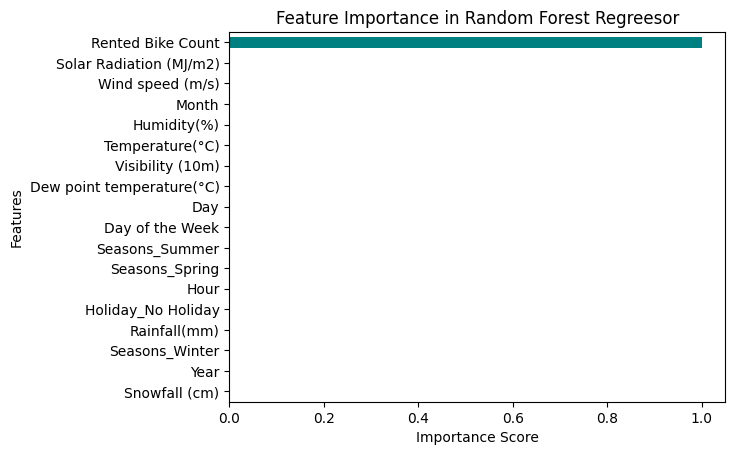

In [66]:
#understanding feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance in Random Forest Regreesor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [67]:
#Hyperparameter Tuning
#defining the parameter grid

param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth': [10, 15 ,20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 2, 4]
}

#initializing Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

#fitting the grid search into the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_) 

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
